## LABORATORY 05: MULTY LAYER PERCEPTRON - CLASSIFICATION PROBLEM

In [4]:
# importing modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scripts.mlp import MLPAlgorithm

### 1. Generate a non-linear dataset

In [ ]:
# Generate a non-linear dataset
np.random.seed(42)
n_samples = 500

# Generate the inner circle (Class 0)
radius_inner = 1
theta_inner = np.random.uniform(0, 2 * np.pi, n_samples // 2)
x_inner = radius_inner * np.cos(theta_inner) + np.random.normal(0, 0.1, n_samples // 2)
y_inner = radius_inner * np.sin(theta_inner) + np.random.normal(0, 0.1, n_samples // 2)

# Generate the outer circle (Class 1)
radius_outer = 3
theta_outer = np.random.uniform(0, 2 * np.pi, n_samples // 2)
x_outer = radius_outer * np.cos(theta_outer) + np.random.normal(0, 0.1, n_samples // 2)
y_outer = radius_outer * np.sin(theta_outer) + np.random.normal(0, 0.1, n_samples // 2)

# Combine into a dataset
X_nonlinear = np.vstack((np.column_stack((x_inner, y_inner)), np.column_stack((x_outer, y_outer))))
y_nonlinear = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))

In [ ]:
# Save the dataset into a file (circle.dat)
dataset = np.column_stack((X_nonlinear, y_nonlinear))
np.savetxt("dataset/circle.dat", dataset, fmt="%.5f", delimiter=" ", comments="")

#### Checking our data to be linar separable 

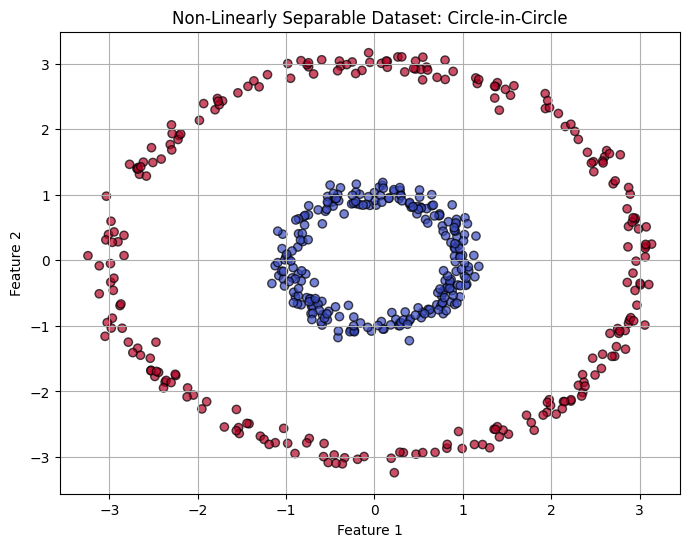

In [6]:
# Visualize the dataset to verify non-linear separability
plt.figure(figsize=(8, 6))
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.title("Non-Linearly Separable Dataset: Circle-in-Circle")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

---
***Comment***: we can see that classes can't be split with one streight line between red and blue points without because of circled shape.

---


### 2. Training the model

In [7]:
# Import dataset
dataset = pd.read_csv("dataset/circle.dat", sep=" ", header=None)

In [8]:
# Split independent and dependent variables
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
x

array([[-7.89740e-01,  5.38810e-01],
       [ 8.00950e-01, -3.10300e-01],
       [-1.57550e-01, -9.55200e-01],
       [-7.28300e-01, -5.84210e-01],
       [ 5.78190e-01,  6.23920e-01],
       [ 4.32330e-01,  8.21660e-01],
       [ 9.51460e-01,  2.26460e-01],
       [ 7.05370e-01, -6.78240e-01],
       [-8.93260e-01, -5.56780e-01],
       [-2.45030e-01, -1.05949e+00],
       [ 9.97470e-01,  7.75900e-02],
       [ 8.67880e-01, -2.93860e-01],
       [ 5.30920e-01, -8.75080e-01],
       [ 2.90510e-01,  1.06765e+00],
       [ 5.23680e-01,  8.11080e-01],
       [ 5.11710e-01,  9.64130e-01],
       [-4.72020e-01,  8.89460e-01],
       [-1.08171e+00, -2.34210e-01],
       [-8.58460e-01,  4.03990e-01],
       [-2.04780e-01,  8.63110e-01],
       [-7.11540e-01, -7.01720e-01],
       [ 1.02514e+00,  6.48690e-01],
       [-2.04630e-01,  1.16162e+00],
       [-5.54150e-01,  7.47950e-01],
       [-8.66750e-01,  2.02560e-01],
       [ 2.84360e-01, -9.54280e-01],
       [ 2.79440e-01,  9.39190e-01],
 

In [10]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [11]:
print(x.shape )
print(y.shape)

(500, 2)
(500,)


In [12]:
# Build MLP architecture
model = MLPAlgorithm(eta=0.1, threshold=1e-4, max_epochs=20000)
model.build_architecture(input_length=2, hidden_length=4, output_length=1)

# Training step
model.fit(x, y)

Epoch  100 : loss =  0.00149
Epoch  200 : loss =  0.00053
Epoch  300 : loss =  0.00032
Epoch  400 : loss =  0.00023
Epoch  500 : loss =  0.00018
Epoch  600 : loss =  0.00014
Epoch  700 : loss =  0.00012
Epoch  800 : loss =  0.0001


---
***Comment***: here we can see that errors are becoming smaller and smaller.

---

In [13]:
# Parameters of MLP architecture
print("Weights for hidden layers: ", model.Wh)
print("Bias for hidden layers: ", model.bh)
print("Weights for output layers: ", model.Wo)
print("Bias for output layers: ", model.bo)

Weights for hidden layers:  [[-2.55950006  2.41728701]
 [ 3.35554316  1.02816039]
 [ 0.77348706  2.64062975]
 [ 0.71169202  3.55361051]]
Bias for hidden layers:  [-5.03218197 -5.15826096  4.01886733  5.42518188]
Weights for output layers:  [[10.16162853 10.27250705 -3.83651285 -6.56314228]]
Bias for output layers:  [4.45659448]


---
***Comment***:
1. Weights for hidden layers: A 4x2 matrix indicating the connections between the 2 input features and 4 hidden neurons. 
2. Bias for hidden layers: These biases adjust the activation thresholds for the neurons, with some large negative values implying strong inhibition before activation.
3. Weights for output layers: A 1x4 matrix connecting the 4 hidden neurons to the single output neuron. Large positive and negative weights indicate how strongly each hidden neuron contributes to the final decision.
4. Bias for output layers: A single value biasing the output neuron. This value (~4.46) shifts the output neuron's activation threshold to ensure the correct classification.
---

In [14]:
# Losses
print("Loss = ", model.loss_)

Loss =  9e-05


---
***Comment*** The final error is very small which is really great for us.

---

---
***Comment:*** Accuracy is perfect.

---

## 3. Calculating metrics

In [16]:
# Evaluate metrics
# Confusion matrix and metrics (accuracy, precision, recall, etc.)
import pandas as pd
from lesson4_scripts.classifiers import KNNModel
from lesson4_scripts.evaluator import EvalClassifier
from lesson4_scripts.deploy import DeployClassifier

In [15]:
# Testing
model.test(x, y)
print("Accuracy = ", model.accuracy, "%")

Accuracy =  100.0 %


In [17]:
# Predictions
y_pred = np.array([model.predict(sample)[1] for sample in x])

#### Confusion matrix

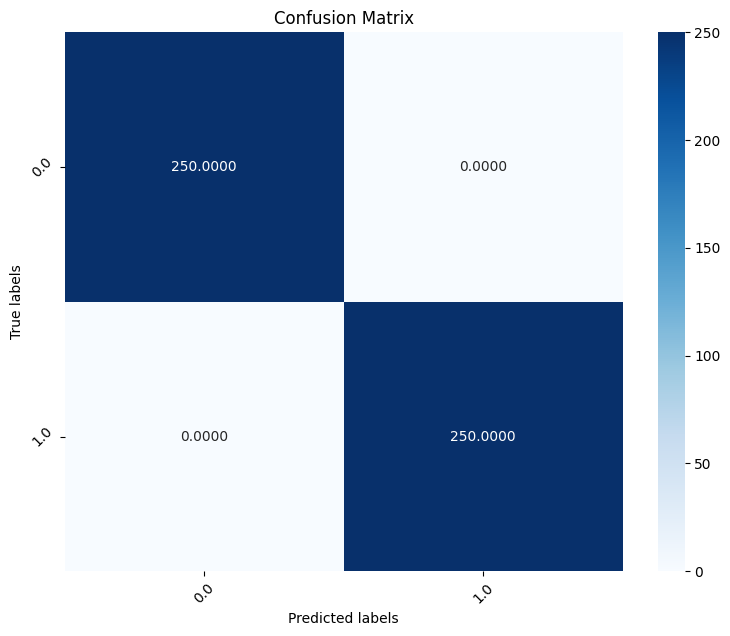

In [18]:
# Classes (0 and 1)
classes = np.unique(y)

# Initialize evaluator
evaluator = EvalClassifier(model)

# Generate confusion matrix
conf_matrix = evaluator.get_confusion_matrix(y_true=y, y_pred=y_pred, classes=classes)

# Plot confusion matrix
evaluator.plot_confusion_matrix(conf_matrix, classes=classes)

---
***Comment:***
As we can see there wasn't a single missclassification. 

---

#### Accuracy, pricision, recall, specificity, f1-score for class 0 and 1

In [19]:
# Metrics by class
metrics_by_class = evaluator.calculate_metrics_by_class(conf_matrix, classes)
print("Metrics by Class:")
print(metrics_by_class)

Metrics by Class:
     accuracy  precision  recall  specificity  f1-score
0.0       1.0        1.0     1.0          1.0       1.0
1.0       1.0        1.0     1.0          1.0       1.0


---
***Comment:*** Every metric is perfect.

---

#### Accuracy, pricision, recall, specificity, f1-score for all classes

In [20]:
# Mean metrics across all classes
metrics_xall = evaluator.calculate_metrics_xall(conf_matrix, metrics_by_class)
print("\nMean Metrics Across All Classes:")
print(metrics_xall)


Mean Metrics Across All Classes:
              accuracy  precision  recall  specificity  f1-score
Mean-metrics       1.0        1.0     1.0          1.0       1.0


---
***Comment:*** 
And again, everything is 100%

---

#### Classification metrics by class

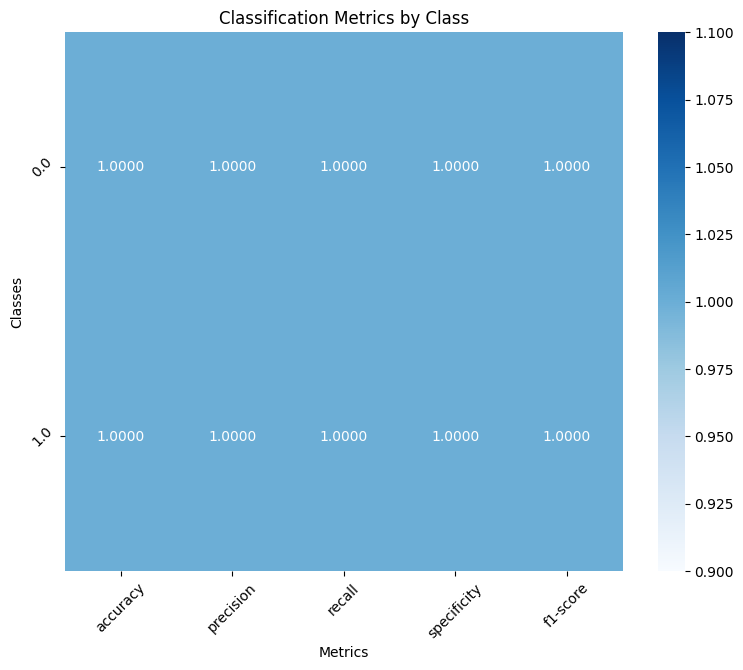

In [21]:
# Plot metrics by class
evaluator.plot_metrics_by_class(metrics_by_class, "Classification Metrics by Class")

### Conclusion

The model achieved 100% accuracy across all metrics for both classes, including precision, recall, specificity, and F1-score. This indicates perfect classification performance on the given dataset, where all predictions were correct. While this result demonstrates the model's strong performance, it is important to assess generalization with additional testing on unseen data to ensure the model is not overfitting.